<a href="https://colab.research.google.com/github/BLOSSOM1994/Tree_maskRcnn/blob/master/tesith/append_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

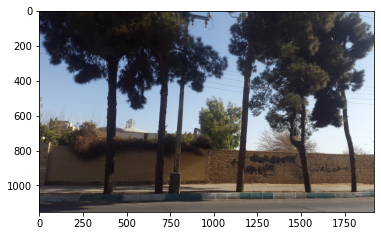

In [ ]:
image = plt.imread('/content/1_1 (23).jpg')
plt.imshow(image)

In [ ]:
# converting to grayscale
gray = rgb2gray(image)

# defining the sobel filters
sobel_horizontal = np.array([np.array([1, 2, 1]), np.array([0, 0, 0]), np.array([-1, -2, -1])])
print(sobel_horizontal, 'is a kernel for detecting horizontal edges')
 
sobel_vertical = np.array([np.array([-1, 0, 1]), np.array([-2, 0, 2]), np.array([-1, 0, 1])])
print(sobel_vertical, 'is a kernel for detecting vertical edges')

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]] is a kernel for detecting horizontal edges
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]] is a kernel for detecting vertical edges


In [ ]:
out_h = ndimage.convolve(gray, sobel_horizontal, mode='reflect')
out_v = ndimage.convolve(gray, sobel_vertical, mode='reflect')
# here mode determines how the input array is extended when the filter overlaps a border.

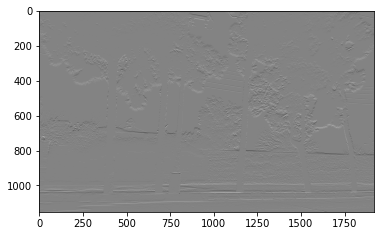

In [ ]:
plt.imshow(out_h, cmap='gray')

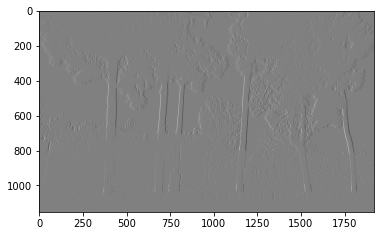

In [ ]:
plt.imshow(out_v, cmap='gray')

In [ ]:
kernel_laplace = np.array([np.array([-1, -1, -1]), np.array([-1, 8, -1]), np.array([-1, -1, -1])])
print(kernel_laplace, 'is a laplacian kernel')

[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]] is a laplacian kernel


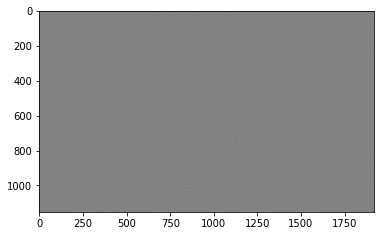

In [ ]:
out_l = ndimage.convolve(gray, kernel_laplace, mode='reflect')
plt.imshow(out_l, cmap='gray')

In [ ]:
kernel_laplace = np.array([np.array([-1, -1, -1,-1,-1]),np.array([-1, -1, -1,-1,-1]),np.array([-1, -1, 24,-1,-1]), np.array([-1, -1, -1,-1,-1]), np.array([-1, -1, -1,-1,-1])])
print(kernel_laplace, 'is a laplacian kernel')

[[-1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1]
 [-1 -1 24 -1 -1]
 [-1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1]] is a laplacian kernel


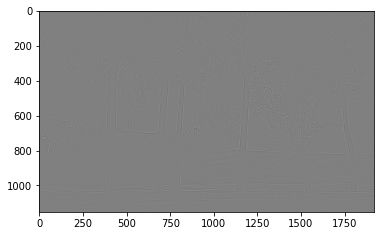

In [ ]:
out_l = ndimage.convolve(gray, kernel_laplace, mode='reflect')
plt.imshow(out_l, cmap='gray')

**روش 2:**

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [ ]:
def sobelfilter(img):
    container = np.copy(img)
    size = container.shape
    for i in range(1, size[0] - 1):
        for j in range(1, size[1] - 1):
            gx = (img[i - 1][j - 1] + 2*img[i][j - 1] + img[i + 1][j - 1]) + (-img[i - 1][j + 1] - 2*img[i][j + 1] - img[i + 1][j + 1])
            gy = (img[i - 1][j - 1] + 2*img[i - 1][j] + img[i - 1][j + 1]) + (-img[i + 1][j - 1] - 2*img[i + 1][j] - img[i + 1][j + 1])
            container[i][j] = min(255, np.sqrt(gx**2 + gy**2))
    print(container)
    return container
    pass

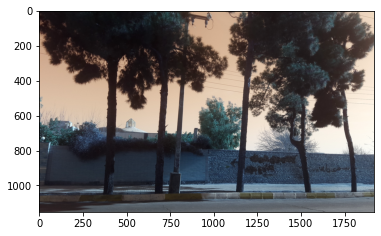

In [ ]:
img = cv2.imread("/content/1_1 (23).jpg")
plt.imshow(img)

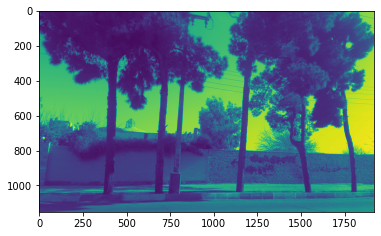

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

[[ 20  20  20 ... 214 212 213]
 [ 19 255 255 ... 255 255 214]
 [ 20 255 255 ... 255 255 214]
 ...
 [ 40 255 255 ... 255 255 133]
 [ 42 255 255 ... 255 255 138]
 [ 43  44  44 ... 142 142 143]]


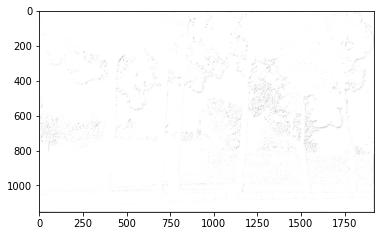

In [ ]:
img = sobelfilter(img)
img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
plt.imshow(img)
plt.show()